<a href="https://colab.research.google.com/github/MeldaChen/Group-4/blob/main/method1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

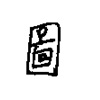

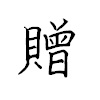

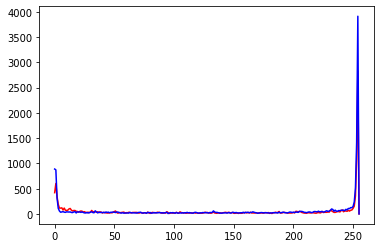

[0.69307137]


In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image
import time
from matplotlib import pyplot as plt 

 
# 最簡單的以灰度直方圖作為相似比較的實現 
def classify_gray_hist(image1,image2,size = (256,256)): 
 # 先計算直方圖 
 # 幾個引數必須用方括號括起來 
 # 這裡直接用灰度圖計算直方圖，所以是使用第一個通道， 
 # 也可以進行通道分離後，得到多個通道的直方圖 
 # bins 取為16 
 image1 = cv2.resize(image1,size) 
 image2 = cv2.resize(image2,size) 
 hist1 = cv2.calcHist([image1],[0],None,[256],[0.0,255.0]) 
 hist2 = cv2.calcHist([image2],[0],None,[256],[0.0,255.0]) 
 # 可以比較下直方圖 
 plt.plot(range(256),hist1,'r') 
 plt.plot(range(256),hist2,'b') 
 plt.show() 
 # 計算直方圖的重合度 
 degree = 0 
 for i in range(len(hist1)): 
  if hist1[i] != hist2[i]: 
   degree = degree + (1 - abs(hist1[i]-hist2[i])/max(hist1[i],hist2[i])) 
  else: 
   degree = degree + 1 
 degree = degree/len(hist1) 
 return degree 
 
# 計算單通道的直方圖的相似值 
def calculate(image1,image2): 
 hist1 = cv2.calcHist([image1],[0],None,[256],[0.0,255.0]) 
 hist2 = cv2.calcHist([image2],[0],None,[256],[0.0,255.0]) 
  # 計算直方圖的重合度 
 degree = 0 
 for i in range(len(hist1)): 
  if hist1[i] != hist2[i]: 
   degree = degree + (1 - abs(hist1[i]-hist2[i])/max(hist1[i],hist2[i])) 
  else: 
   degree = degree + 1 
 degree = degree/len(hist1) 
 return degree 
 
# 通過得到每個通道的直方圖來計算相似度 
def classify_hist_with_split(image1,image2,size = (256,256)): 
 # 將影象resize後，分離為三個通道，再計算每個通道的相似值 
 image1 = cv2.resize(image1,size) 
 image2 = cv2.resize(image2,size) 
 sub_image1 = cv2.split(image1) 
 sub_image2 = cv2.split(image2) 
 sub_data = 0 
 for im1,im2 in zip(sub_image1,sub_image2): 
  sub_data += calculate(im1,im2) 
 sub_data = sub_data/3 
 return sub_data 
 
# 平均雜湊演算法計算 
def classify_aHash(image1,image2): 
 image1 = cv2.resize(image1,(8,8)) 
 image2 = cv2.resize(image2,(8,8)) 
 gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY) 
 gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY) 
 hash1 = getHash(gray1) 
 hash2 = getHash(gray2) 
 return Hamming_distance(hash1,hash2) 
 
def classify_pHash(image1,image2): 
 image1 = cv2.resize(image1,(32,32)) 
 image2 = cv2.resize(image2,(32,32)) 
 gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY) 
 gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY) 
 # 將灰度圖轉為浮點型，再進行dct變換 
 dct1 = cv2.dct(np.float32(gray1)) 
 dct2 = cv2.dct(np.float32(gray2)) 
 # 取左上角的8*8，這些代表圖片的最低頻率 
 # 這個操作等價於c++中利用opencv實現的掩碼操作 
 # 在python中進行掩碼操作，可以直接這樣取出影象矩陣的某一部分 
 dct1_roi = dct1[0:8,0:8] 
 dct2_roi = dct2[0:8,0:8] 
 hash1 = getHash(dct1_roi) 
 hash2 = getHash(dct2_roi) 
 return Hamming_distance(hash1,hash2) 
 
# 輸入灰度圖，返回hash 
def getHash(image): 
 avreage = np.mean(image) 
 hash = [] 
 for i in range(image.shape[0]): 
  for j in range(image.shape[1]): 
   if image[i,j] > avreage: 
    hash.append(1) 
   else: 
    hash.append(0) 
 return hash 
 
 
# 計算漢明距離 
def Hamming_distance(hash1,hash2): 
 num = 0 
 for index in range(len(hash1)): 
  if hash1[index] != hash2[index]: 
   num += 1 
 return num 
 
 
if __name__ == '__main__': 
 img1 = cv2.imread('test1.jpg') 
 cv2_imshow(img1) 
 img2 = cv2.imread('test2.jpg') 
 cv2_imshow(img2) 
 degree = classify_gray_hist(img1,img2) 
 #degree = classify_hist_with_split(img1,img2) 
 #degree = classify_aHash(img1,img2) 
 #degree = classify_pHash(img1,img2) 
 print(degree) 
 cv2.waitKey(0)